In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare         

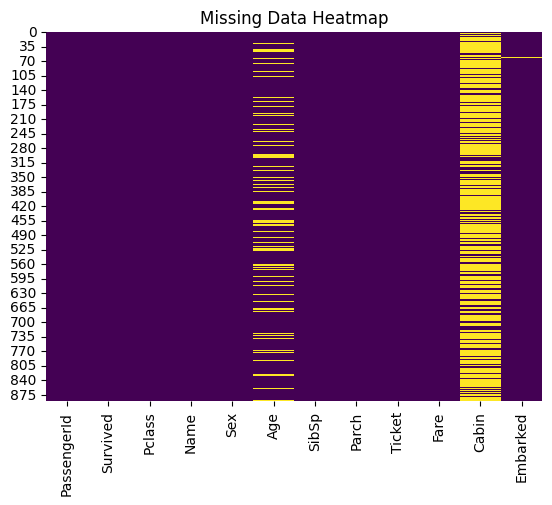

C:\Users\Devansh Kumar\AppData\Local\Temp\ipykernel_31876\2093152990.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


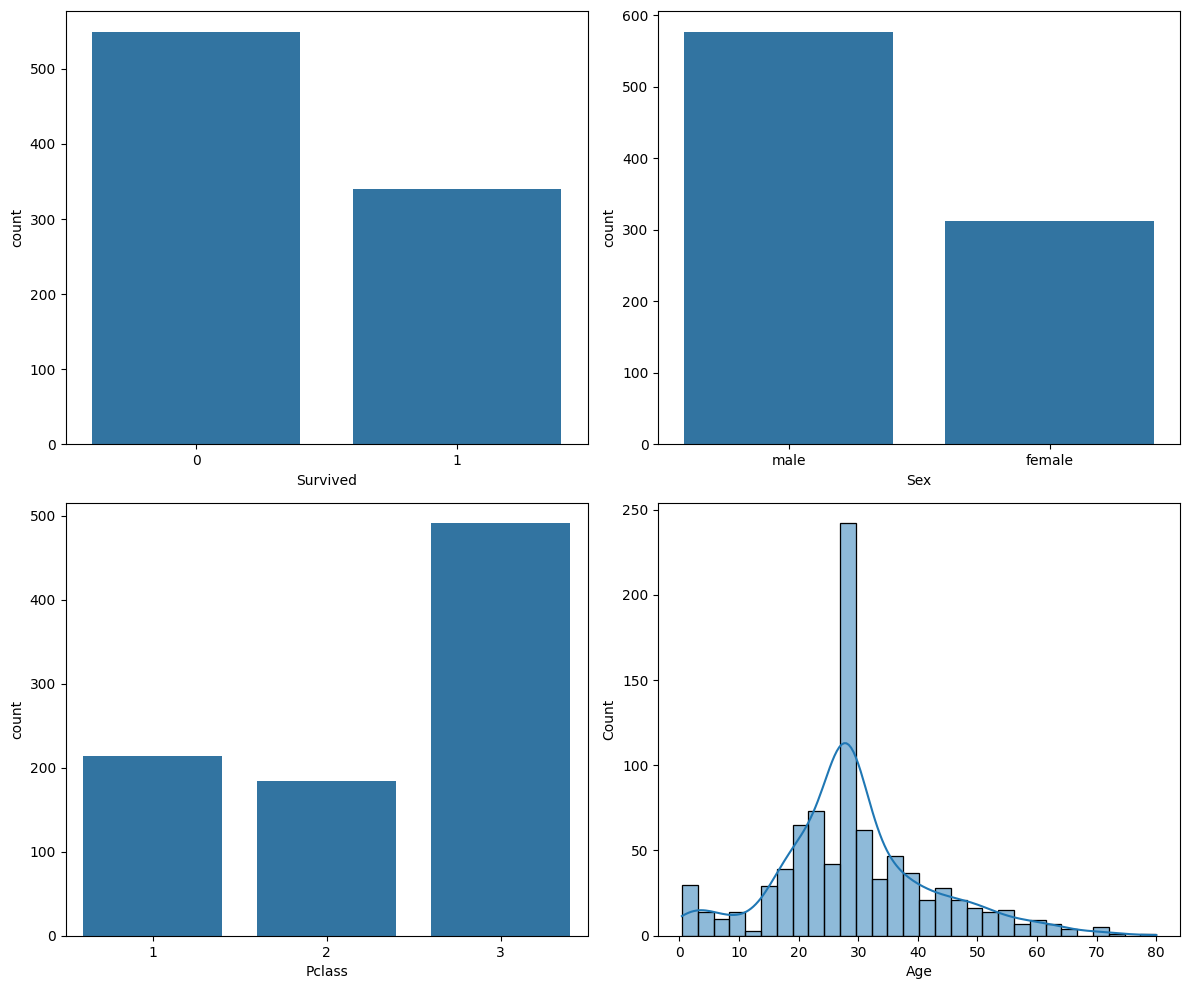

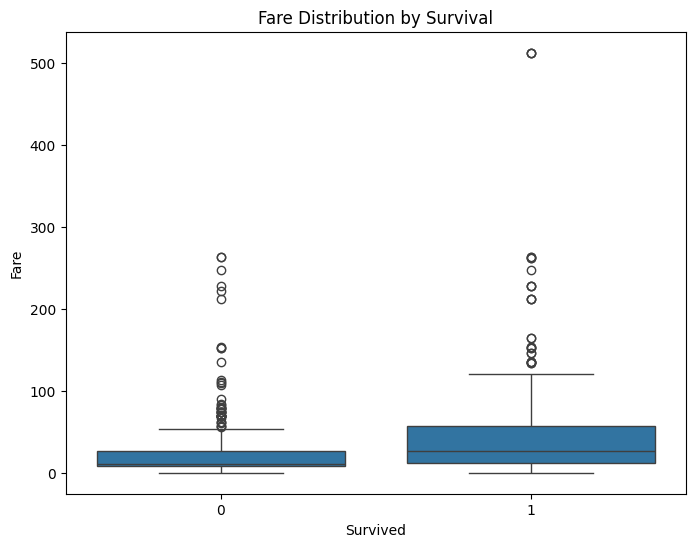

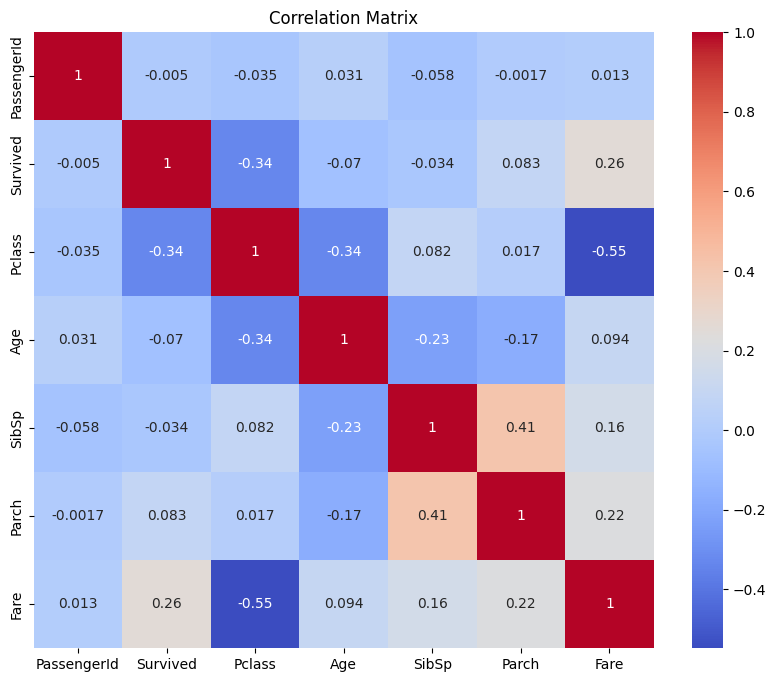

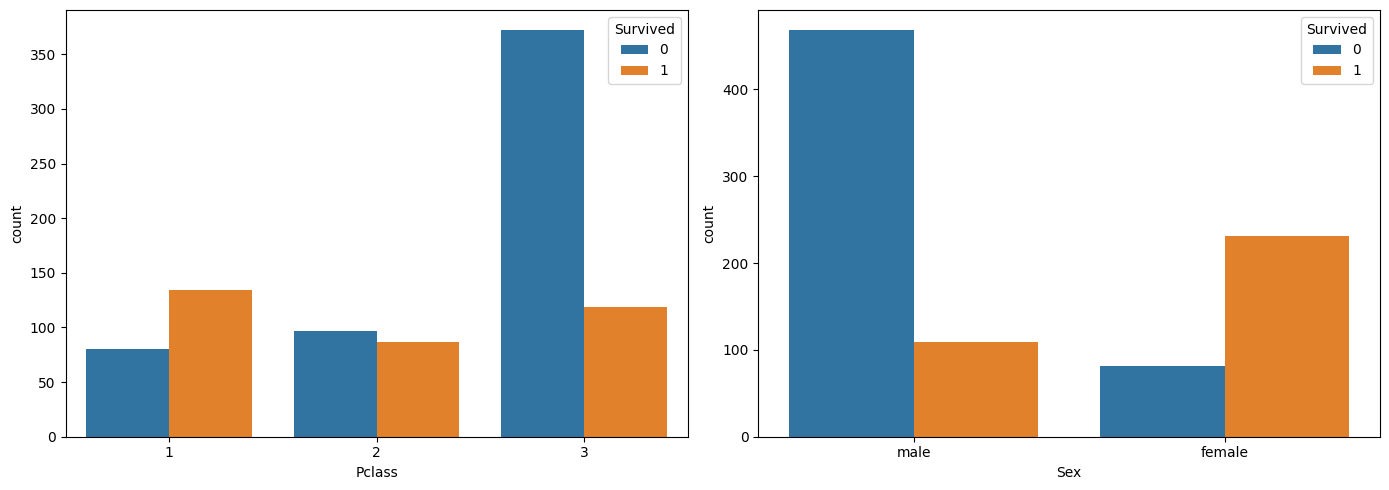

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [2]:
def load_data(path='train.csv'):
    df = pd.read_csv(path)
    print("Dataset shape:", df.shape)
    print(df.info(), "\n")
    return df

def missing_values(df):
    print("Missing values per column:\n", df.isnull().sum(), "\n")
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.show()

def clean_data(df):
    df = df.copy()
    # Drop Cabin (too many missing), drop rows missing Embarked
    df.drop('Cabin', axis=1, inplace=True)
    df.dropna(subset=['Embarked'], inplace=True)
    # Impute Age with median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    return df

def univariate_analysis(df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.countplot(x='Survived', data=df, ax=axes[0, 0])
    sns.countplot(x='Sex', data=df, ax=axes[0, 1])
    sns.countplot(x='Pclass', data=df, ax=axes[1, 0])
    sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1, 1])
    plt.tight_layout()
    plt.show()

def detect_outliers(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title("Fare Distribution by Survival")
    plt.show()

def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    corr = df.select_dtypes(include='number').corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

def bivariate_plots(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0])
    sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1])
    plt.tight_layout()
    plt.show()

def feature_engineering(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    return df

def run_eda(path='train.csv'):
    df = load_data(path)
    missing_values(df)
    df_clean = clean_data(df)
    univariate_analysis(df_clean)
    detect_outliers(df_clean)
    correlation_heatmap(df_clean)
    bivariate_plots(df_clean)
    df_feat = feature_engineering(df_clean)
    print(df_feat[['FamilySize','IsAlone']].head())

if __name__ == '__main__':
    run_eda()
